# Gráfica de regresión y coeficientes de correlación

Utilizo gráficas de regresión cuando quiero visualizar no solo si existe una relación entre dos variables, sino también **cómo es esa relación**, representada mediante una línea que estima la tendencia general de los datos.

Estas gráficas me ayudan a entender patrones, predecir valores y comprobar si la relación entre las variables es lineal o no.

Quizás te preguntes: *¿pero esto no es lo mismo que una gráfica de dispersión?*  
Y la respuesta es: casi. La diferencia es que la gráfica de regresión **incluye una línea de tendencia** sobre los mismos puntos de la dispersión.

Como una imagen vale más que mil palabras, veámoslo con una gráfica:

<img src="../files/correlacion_vs_regresion.png" alt="gráficas" width="400">



```
Detectar la correlación entre variables puede ayudar a hacer predicciones.

```

Si una variable está fuertemente correlacionada con otra, y tengo datos faltantes en una de ellas, puedo usar esa relación para estimar o predecir los valores perdidos. Esto es especialmente útil cuando la correlación es alta y la relación puede modelarse mediante una regresión.

> Ver solo la dispersión no es suficiente para predecir.

💡 ¿Por qué es importante esta distinción?

La **correlación** por sí sola **indica que dos variables se mueven juntas**, pero no implica una relación causal, ni garantiza que puedas predecir con precisión.

Para predecir valores, lo ideal es usar modelos como la **regresión lineal**, que aprovechan esa correlación para **estimar los valores de una variable a partir de otra**.

Es decir: para poder hacer predicciones necesitamos la **línea de regresión**, no solo una gráfica de dispersión, como vimos en el ejemplo anterior.

> 👉 La correlación y la dispersión te dicen: "parece que hay una relación".
>
> 👉 La regresión te dice: "así es esa relación, y puedo usarla para predecir valores faltantes o futuros".



In [8]:
import pandas as pd
# 1️⃣ cargo los datos 

penguin_df= pd.read_csv('../data/pinguinos.csv')
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
# 2️⃣ limpio los datos 

penguin_df = penguin_df.dropna()
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## coeficiente de correlación
un coeficiente de correlación es **un número** que va de `-1 a 1` e indica la fuerza y dirección de la relación entre dos variables. 

- `1` cuanto más se acerque al `1` más **positiva** será la correlación hasta llegar al valor `1` que indica una relación positiva perfecta 
- `-1` cuanto más se acerque al `- 1` más **negativa** será la correlación de las variables `- 1` indica una relación negativa perfecta (cuando una variable aumenta, la otra disminuye). 
- `0` indica que **no hay relación lineal** entre las variables.


- Un coeficiente cercano a 1 o -1 indica una relación fuerte, mientras que un coeficiente cercano a 0 indica una relación débil.
- Un coeficiente de 0.8 o -0.8 se considera fuerte, mientras que un coeficiente de 0.5 o -0.5 se considera moderado.

<img src="../files/diagrama_de_dispersion.svg" alt="gráficas" width="400">

Ahora vamos a visualizar la dispersión en nuestro dataset de pingüinos

vamos a visualizarlo son seaborn
eje X longitud de las aletas 🐧 eje y longitud del pico🐧

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

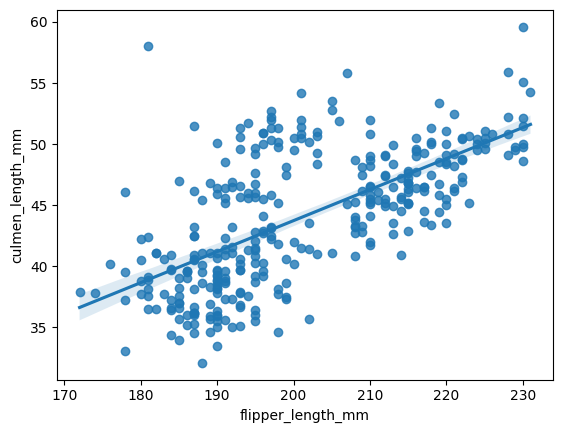

In [14]:
import seaborn as sns

sns.regplot(data=penguin_df,
            x='flipper_length_mm', 
            y='culmen_length_mm'
            )

Vamos a dismunir el tamaño de los puntos para que resalte más la línea de regresión 👇


<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

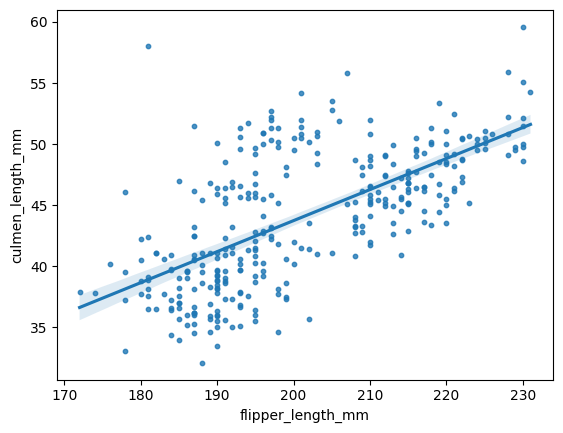

In [15]:
            
sns.regplot(data=penguin_df,
            x='flipper_length_mm', 
            y='culmen_length_mm'
            # vamos a dismunir el tamaño de los puntos 
            , scatter_kws={'s': 10}
            )




Para poder sacar el número del coeficiente de correlación, vamos a usar la librería `scipy` y la función `pearsonr` que nos devuelve el coeficiente de correlación de Pearson y el valor p asociado. 

In [16]:
import scipy as sp
sp.stats.pearsonr(penguin_df['flipper_length_mm'], penguin_df['culmen_length_mm'])
# 3️⃣ guardo los datos

PearsonRResult(statistic=np.float64(0.6521257442177317), pvalue=np.float64(7.874576982844369e-42))